# 数据集可视化

In [85]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

设置COVID-19文件夹里的数据路径

In [86]:
base_dir = './dataset/Train/COVID-19'
img_dir = os.path.join(base_dir, 'images')
mask_dir = os.path.join(base_dir, 'infection masks')

只拿第一张 png 图片做测试

In [92]:
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise FileNotFoundError("没有找到图片，请检查路径是否拼写正确！")

sample_filename = image_files[0] 
img_path = os.path.join(img_dir, sample_filename)
mask_path = os.path.join(mask_dir, sample_filename)

读取图片

In [88]:
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask_gray = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if img_gray is None or mask_gray is None:
    raise ValueError(f"图片读取失败，请检查文件是否存在: {sample_filename}")

In [89]:
# 灰度图只有黑白灰，为了能画出鲜艳的红色，我们必须先用 cv2 把它“伪装”成三通道的 RGB 彩色图
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
img_overlay = img_rgb.copy()

infection_area = mask_gray > 0

img_overlay[infection_area, 0] = 200                                   # R 通道设为红
img_overlay[infection_area, 1] = img_overlay[infection_area, 1] * 0.5  # G 通道变暗
img_overlay[infection_area, 2] = img_overlay[infection_area, 2] * 0.5  # B 通道变暗

可视化图片

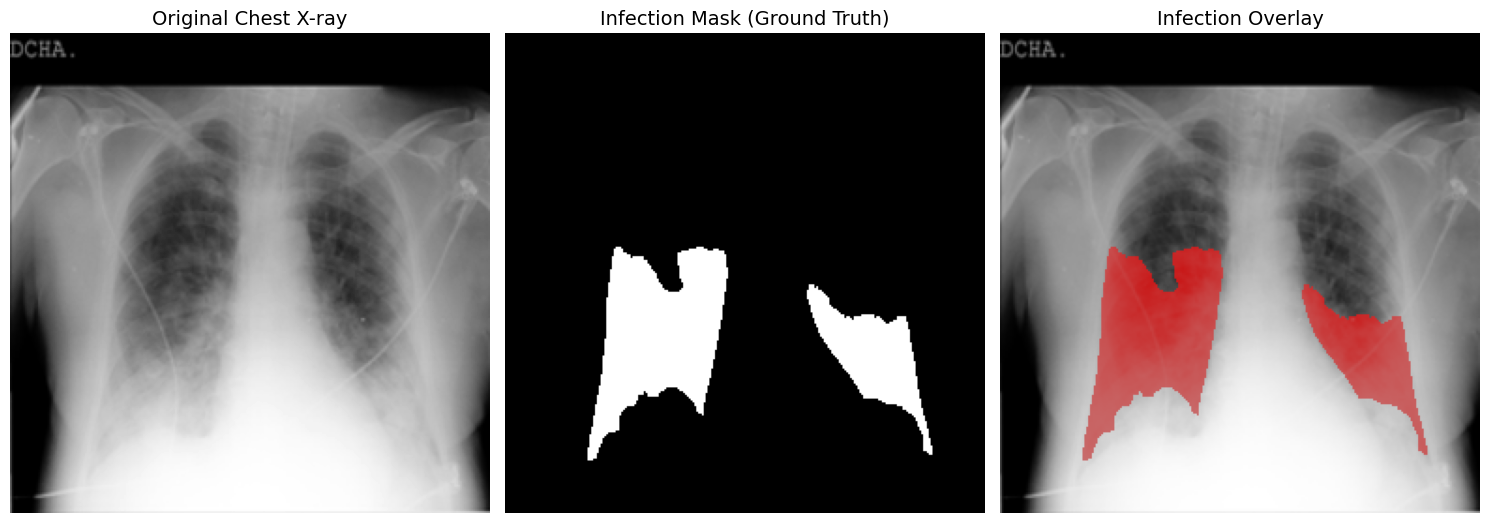

In [90]:
plt.figure(figsize=(15, 10))

# 第一张图：原始 X 光片
plt.subplot(1, 3, 1)
plt.title('Original Chest X-ray', fontsize=14)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# 第二张图：医生标注的病灶掩码
plt.subplot(1, 3, 2)
plt.title('Infection Mask (Ground Truth)', fontsize=14)
plt.imshow(mask_gray, cmap='gray')
plt.axis('off')

# 第三张图：直观的叠加效果
plt.subplot(1, 3, 3)
plt.title('Infection Overlay', fontsize=14)
plt.imshow(img_overlay) # imshow 默认接受 RGB 格式的三通道矩阵
plt.axis('off')

# 自动调整子图间距并显示
plt.tight_layout()
plt.show()